***
***

<center><h1> Machine Learning - Porco ou Cachorro? </h1></center>

***
***

<center><img src = 'https://forgifs.com/gallery/d/297059-2/Husky-dog-wakes-pig.gif'></center>

***

# Estrutura: <br>
    
***
A. **Descrição dos Atributos** <br>
I. [Pelo_longo](#Pelo_longo)<br>
II. [Perna_curta](#Perna_curta)<br>
III. [Faz_auau](#Faz_auau)<br>

B. **Importação das Bibliotecas Básicas** <br>
I. [Instalações](#Instalações) <br>
II. [Importações](#Importações) <br>
III. [verificação](#Verificando_Versões_Instaladas) <br>

C. **Importando a Base de Dados** <br>
I. [Carregando a Base de Dados](#Carregando_Base_de_Dados) <br>
II. [Estrutura dos Dados](#Estrutura_dos_Dados) <br>
III. [Informações Gerais](#informações_gerais) <br>

D. **Análise das Características dos Animais**<br>
I. [Distribuição das Classes](#Distribuição_das_Classes) <br>

E. **Separação dos Dados**<br>
I. [Bibliotecas Utilizadas](#bibliotecas)<br>
II. [Separando os dados para treino e teste](#train_test)<br>


F. **LinearSVC**<br>
I. [Instânciando o LinearSVC](#instanciando) <br>
II. [Treinando Modelo](#treinando) <br>
III. [Relatório do LinearSVC](#Relatorio)

# A. Descrição dos Atributos: <br>

Variáveis de Entrada

## Ai. Pelo_longo:


<a id="Pelo_longo"></a>

> O atributo <b>pelo_longo</b> nos informa se o animal em análise tem pelo comprido ou não, se está marcado como <b>1</b>, então sim o animal tem pelo comprido, de forma contraria, se estiver marcado com <b>0</b>, o animal não tem pelo comprido .

## Aii. Perna_curta:

<a id="Perna_curta"></a>

> A variável <b>Perna_curta</b> é a classificação do comprimento da perna do animal; se estiver marcado como <b>1</b>, foi classificado que o animal tem uma perna longa; em contraste, <b>0</b> indica que o animal tem uma perna curta.

## Aiii. Faz_auau:

<a id = "Faz_auau"></a>

> Com este atributo, temos a informação se um determinado animal late ou não, o funcionamento não é diferente das outras variáveis acima, como vimos se está marcado com 1, então sim o animal late, se está marcado com 0, então o animal sob análise não late, lembrando que no conjunto usado neste projeto existem cães que não latem, o motivo pelo qual não é descrito.

# B. Importação das Bibliotecas Básicas <br>

> Nesta primeira etapa, instalarei, importarei e verificarei todas as principais bibliotecas básicas que serão usadas ao longo do projeto, lembrando que essas são as bibliotecas básicas nas quais a maioria dos projetos que envolvem análise de dados e construção de modelos preditivos usa. Os links para a documentação de cada biblioteca estão abaixo.

> * matplotlib-: https://matplotlib.org/
> * Pytorch-: https://pytorch.org/
> * seaborn-: https://seaborn.pydata.org/
> * Pandas-: https://pandas.pydata.org/docs/#
> * numpy-: https://numpy.org/

## Bi. Instalações:

<a id="Instalações"></a>

In [1]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install seaborn --quiet
!pip install matplotlib --quiet

## Bii. Importações:

<a id="Importações"></a>

In [2]:
# Ignoring Errors
import warnings
warnings.simplefilter("ignore")

import matplotlib

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Biii. Verificando as Versões Instaladas:

<a id ="Verificando_Versões_Instaladas"></a>

In [4]:
print('---------= Versions =---------')
print(f' Matplotlib version-: {matplotlib.__version__}')
print(f' Seaborn version-: {sns.__version__}')
print(f' Pandas version-: {pd.__version__}')
print(f' Numpy version-: {np.__version__}')
print('-' * 29)

---------= Versions =---------
 Matplotlib version-: 3.1.3
 Seaborn version-: 0.10.0
 Pandas version-: 0.25.3
 Numpy version-: 1.18.1
-----------------------------


# C. Importando a Base de Dados <br>

## Ci. Carregando a Base de Dados:

<a id="Carregando_Base_de_Dados"></a>

In [5]:
uri = 'porco_cachorro.csv'
dados = pd.read_csv(uri)

***Visualizando os Dados***

In [6]:
dados.head(10)

,Pelo_longo,Perna_curta,Faz_auau,Porco_cachorro
0,1,0,0,1
1,0,0,1,0
2,0,1,1,0
3,1,0,0,1
4,0,0,0,1
5,1,0,0,1
6,1,0,1,0
7,1,1,0,1
8,0,1,1,0
9,1,1,0,1


## Cii. Estrutura dos Dados:

<a id ="Estrutura_dos_Dados"></a>

In [7]:
dados.shape

(5118, 4)

In [8]:
print('--= Estrutura dos Dados =--')
print(f'    {dados.shape[0]} - Linhas')
print(f'    {dados.shape[1]} - Colunas')
print('-----------------------------')

--= Estrutura dos Dados =--
    5118 - Linhas
    4 - Colunas
-----------------------------


## Ciii. Informações Gerais:

<a id = "informações_gerais"></a>

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 4 columns):
Pelo_longo        5118 non-null int64
Perna_curta       5118 non-null int64
Faz_auau          5118 non-null int64
Porco_cachorro    5118 non-null int64
dtypes: int64(4)
memory usage: 160.1 KB


# D. Análise das Características dos Animais <br>

## Di. Distribuição das Classes:

<a id ="Distribuição_das_Classes"></a>

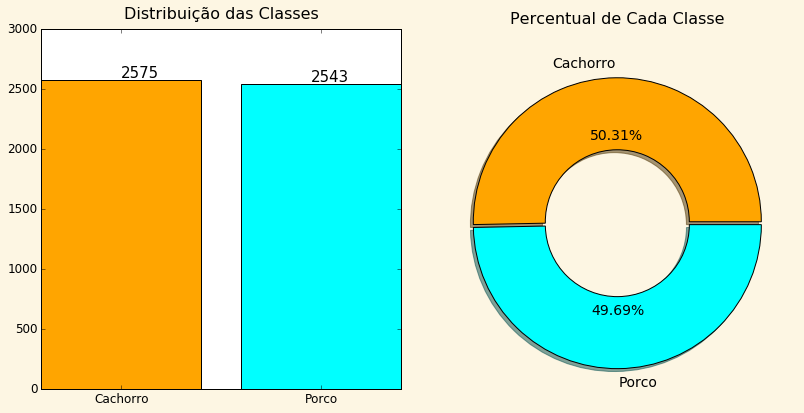

In [10]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize = (5, 5))
plt.style.use('classic')

eixo1 = fig.add_axes([0, 1, 1, 1])
eixo1.bar(['Cachorro', 'Porco'], dados['Porco_cachorro'].value_counts().values, color = ['orange', 'aqua'], edgecolor = 'k')
eixo1.set_title('Distribuição das Classes', fontsize = 16, pad=10)

eixo1.annotate(f"{dados['Porco_cachorro'].value_counts().values[0] }", xy=(0, dados['Porco_cachorro'].value_counts().values[0] + 20), fontsize = 15, color = 'k')
eixo1.annotate(f"{dados['Porco_cachorro'].value_counts().values[1]}", xy=(0.95, dados['Porco_cachorro'].value_counts().values[1] + 20), fontsize = 15, color = 'k')
eixo2 = fig.add_axes([1.1, 0.96, 1, 1])
eixo2.pie(dados['Porco_cachorro'].value_counts(), colors = ['orange', 'aqua'], shadow = True, autopct='%.2f%%',
         textprops={'size':14, 'color' : 'k'}, labels=['Cachorro', 'Porco'], explode=(.01, .01), wedgeprops=dict(width=.5))
eixo2.set_title('Percentual de Cada Classe', fontsize = 16, pad=20);

# E. Processo de Separação dos Dados <br>

## Ei. Bibliotecas Utilizadas:

<a id = "bibliotecas"></a>

In [11]:
from sklearn.model_selection import train_test_split as tts

## Eii. Separando os dados para treino e teste:

<a id = "train_test"></a>

In [12]:
# Fixando um seed aleatório
np.random.seed(2020)

# Separando todos os dados em variáveis genéricas x e y
x = dados[['Pelo_longo', 'Perna_curta', 'Faz_auau']]
y = dados['Porco_cachorro']

# Utilizando o modulo do scikit-learning para separar os dados em treino e teste
train_x, test_x, train_y, test_y = tts(x, y, test_size=.2, stratify=y)

# F. LinearSVC <br>

**Importando estimador LinearSVC**

In [13]:
from sklearn.svm import LinearSVC

## Fi. Instânciando o LinearSVC:

<a id = "instanciando"></a>

In [14]:
# Instânciando o LinearSVC
modelo_svc = LinearSVC()

# Visualizando o estimador
modelo_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Fii. Treinando Estimador:

<a id = "treinando"></a>

In [15]:
modelo_svc.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Fiii. Relatório do Classificador LinearSVC:

<a id = "relatorio"></a>

<h4>Métricas Utilizadas:</h4>

---
<b>Accuracy = $\frac{TP + TN}{TP + TN + FN + FP}$</b>

<b>Precision = $\frac{TP}{TP + FP}$</b>

<b>Recall = $\frac{TP}{TP + FN}$</b>

<b>F1-Score = $2 * \frac{Precision * Recall}{Precision + Recall}$</b>

**Bibliotecas Utilizadas**

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
def relatorio_linearsvc():
        
    # Previsões
    previsoes = modelo_svc.predict(test_x)
    
    # Gerando relatório de classificação
    print(f'Relatório de Classificação\n{classification_report(test_y, previsoes)}')
    
    # Matriz de Confusão
    plt.style.use('seaborn')
    sns.heatmap(confusion_matrix(test_y, previsoes), annot = True, lw=1.5, fmt='d', color = 'k', edgecolor = 'k')
    
    # Labels
    plt.xlabel('Valor Predito', fontsize = 15)
    plt.ylabel('Valor Real', fontsize = 15)
    plt.title('Matriz de Confusão', fontsize = 18, pad=10)

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       515
           1       0.99      1.00      1.00       509

    accuracy                           1.00      1024
   macro avg       1.00      1.00      1.00      1024
weighted avg       1.00      1.00      1.00      1024



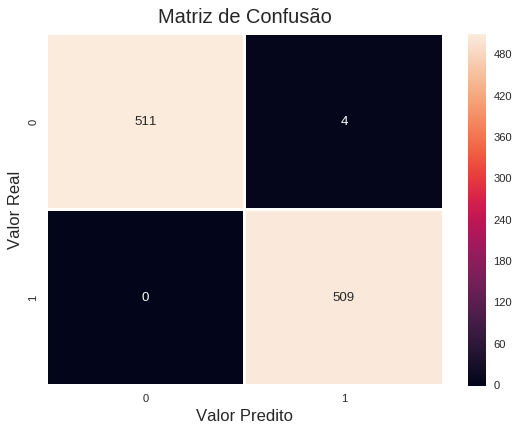

In [18]:
relatorio_linearsvc()